Episode 0


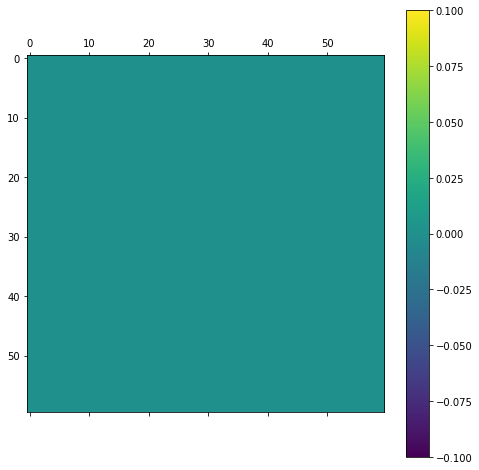

/Users/drobles/anaconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Episode 100


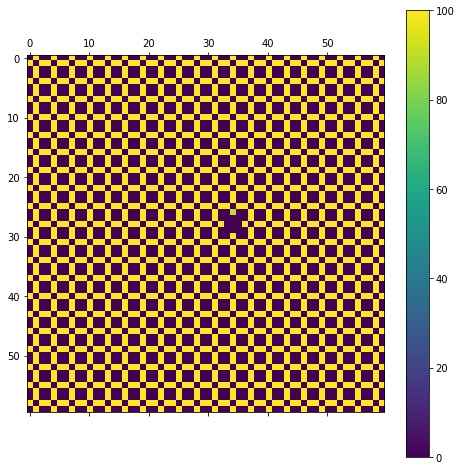

Episode 200


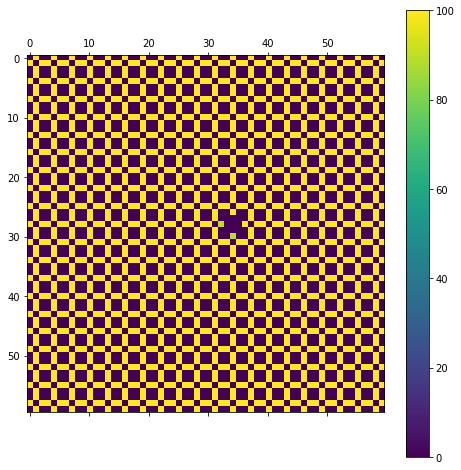

Episode 300


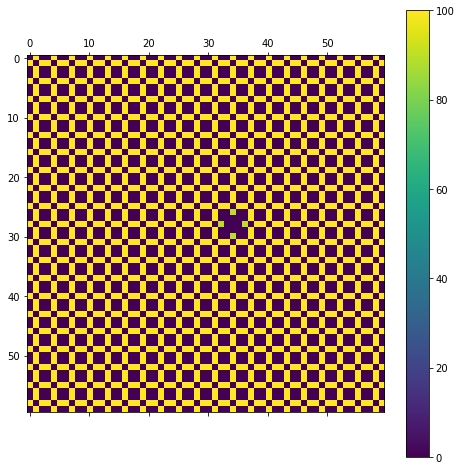

Episode 400


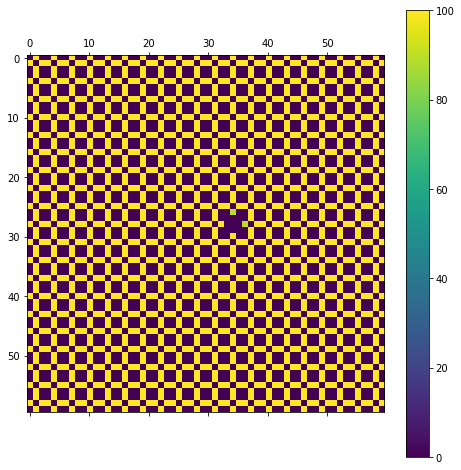

Episode 500


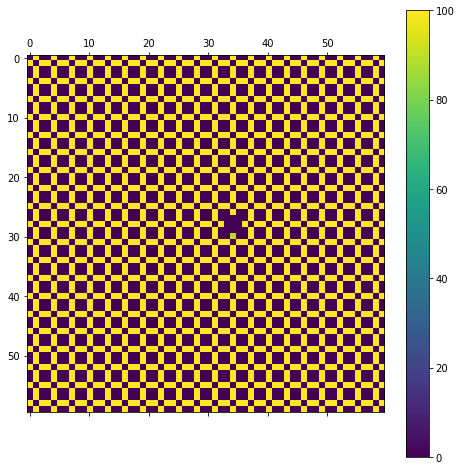

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import QLearning
from myelin.core import RLInteraction, MDPEnvironment
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS = 20
COLS = 20

mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)

# actions = env.get_actions(env.get_state())
# print(type(actions[0]))

class TabularQFunction:
    def __init__(self):
        self._table = np.zeros((ROWS * 3, COLS * 3))

    def __setitem__(self, key, value):
        state, action = key
        sa = tuple((np.array(state) * 3) + 1 + np.array(action))
        self._table[sa] = value

    def __getitem__(self, key):
        state, action = key
        sa = tuple((np.array(state) * 3) + 1 + np.array(action))
        if sa not in self._table:
            self._table[sa] = 100
        return self._table[sa]


qf = TabularQFunction()
agent = QLearning(env.action_space, policy, qf)

def show_value_function(qf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.matshow(qf._table)
    plt.colorbar()
    plt.show()

    
class Monitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 100 == 0:
            print('Episode {}'.format(episode))
            show_value_function(qf)

    def on_train_end(self, episode):
        print('Episode {}'.format(episode))
        show_value_function(qf)


RLInteraction(env, agent).train(500, callbacks=[Monitor()])